# Data Exploration 

#### Fisrt, import the neccesry liberaries.
#### And proceed with data exploration, check kind of information I have and thier types.

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

df = pd.read_csv('hotel_bookings_dataset\hotel_bookings.csv')
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [21]:
for (colname,colval) in df.iteritems():
    print(colname)
    

hotel
is_canceled
lead_time
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
meal
country
market_segment
distribution_channel
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
assigned_room_type
booking_changes
deposit_type
agent
company
days_in_waiting_list
customer_type
adr
required_car_parking_spaces
total_of_special_requests
reservation_status
reservation_status_date


In [22]:
df.nunique()


hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

# Data Cleaning & Preprocessing 

#### Firt thing I will attempt the NULL values in the data set. The coming graph shall show the percentage of non-null values for all attributes.

<AxesSubplot:>

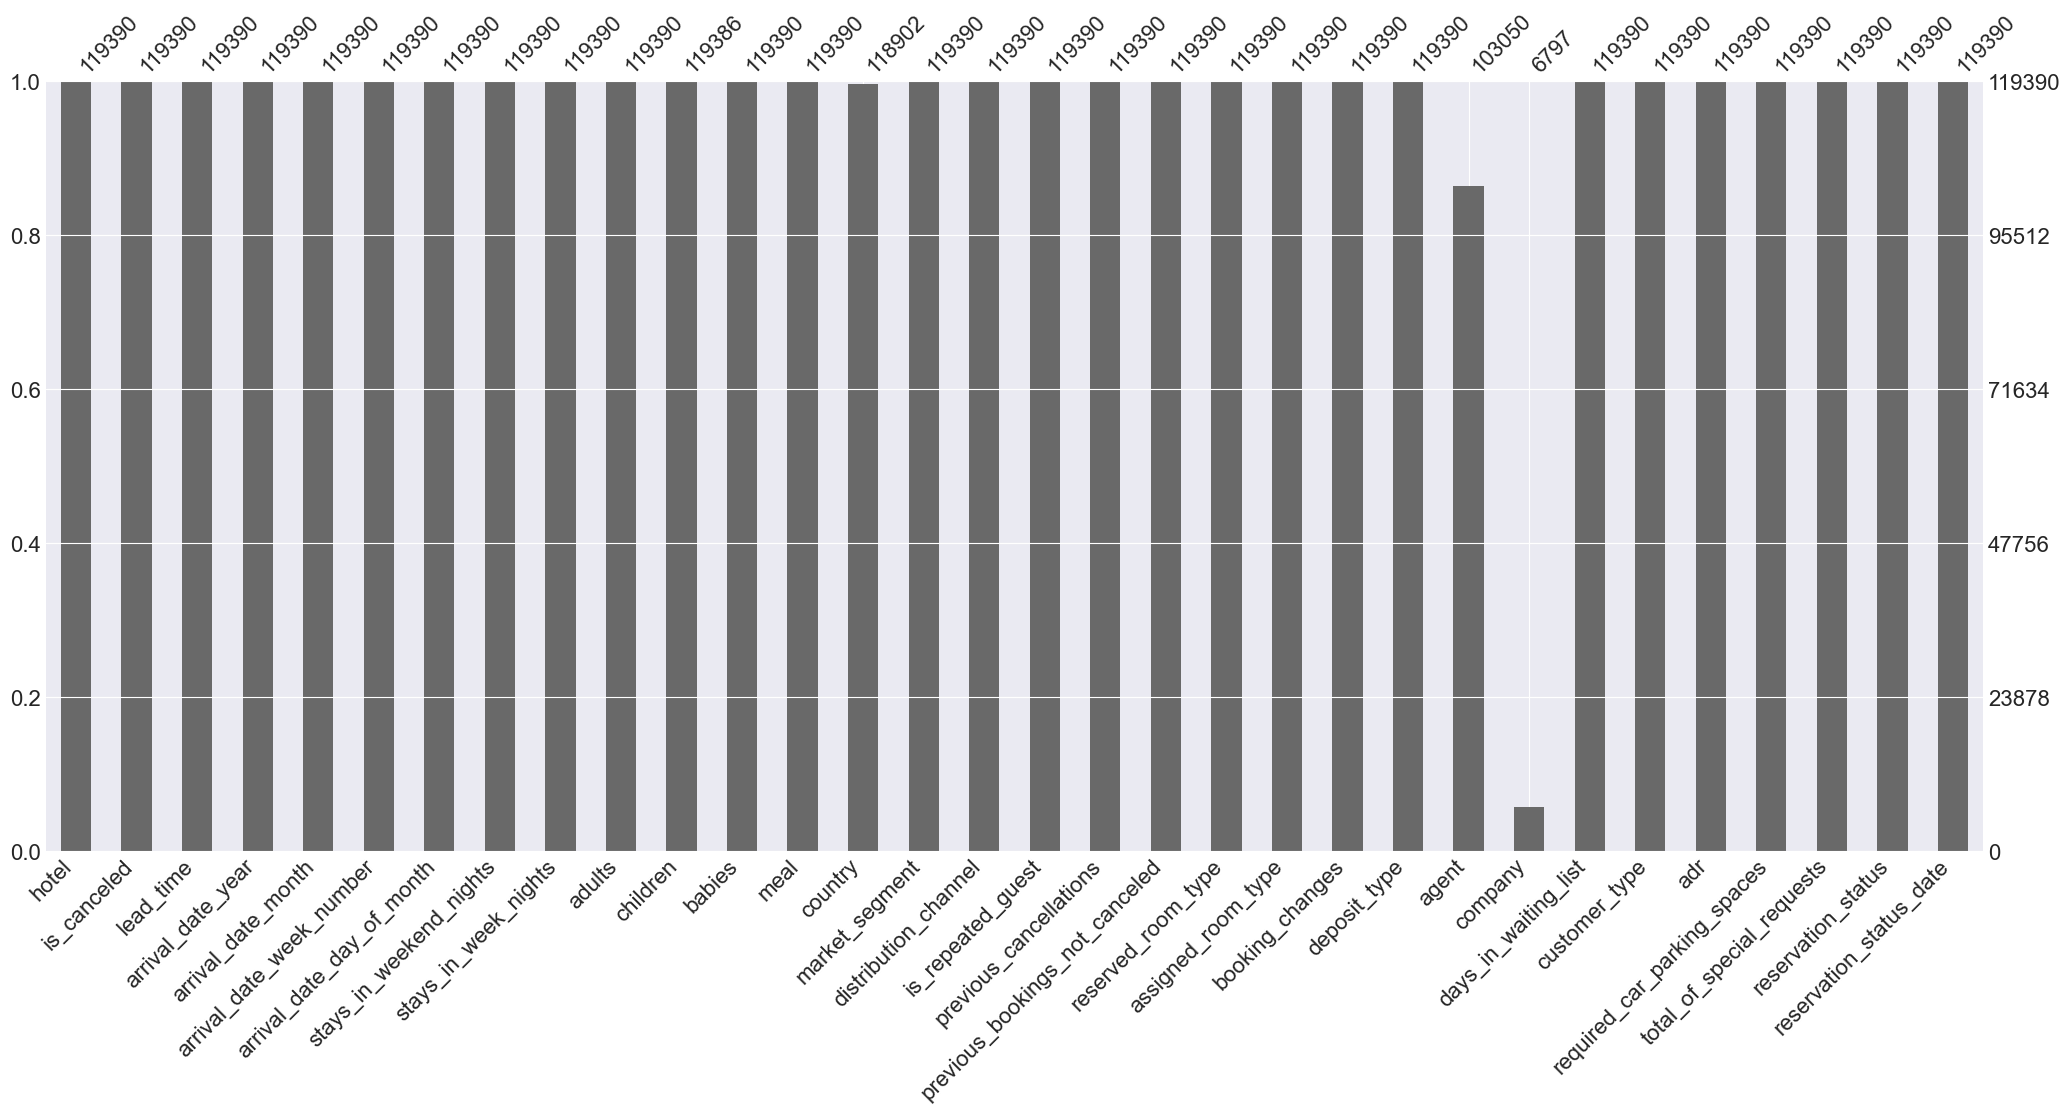

In [23]:
msno.bar(df)

#### Since the available values(non null) of comapny attribute is less than 10%
#### I would consider dropping the attribute (company)


#### The dataset after dropping company column.

In [24]:
df = df.drop("company", axis='columns')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


#### Fill the nan values in agnet with 0 to represent absence of agent name
#### Convert type to int

In [25]:
df['agent'] =  df['agent'].fillna(0)

In [26]:
df['agent'] = df['agent'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<AxesSubplot:>

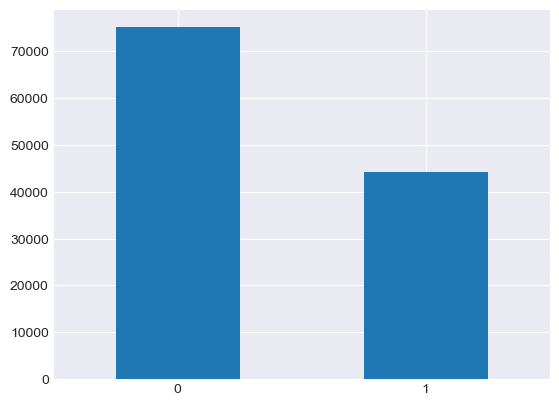

In [27]:
df['is_canceled'].value_counts().plot(kind='bar',rot=0)

#### Now that we have only few rows missing let's drop them 

In [28]:
df.dropna()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Analysis

#### In this section we perform the analysis

## Resevation Booking Meduim 

#### This analysis examines and bring insights to the hotels by whom the resevation are mostly made

<AxesSubplot:>

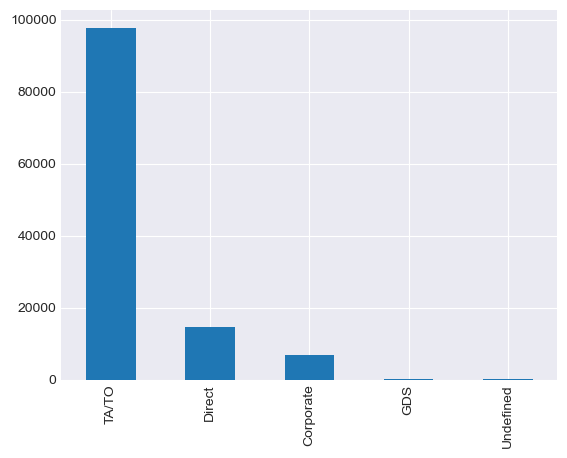

In [29]:
df['distribution_channel'].value_counts().plot.bar()

#### We can see that most of the reservations comes from TA/TO. Perhabs we can investigate for each hotel wich TA/TO agents prings more reservations.


C:\Users\malkhathery\AppData\Local\Temp\ipykernel_11052\1468501748.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  agent_per_hotel = city.append(resort)


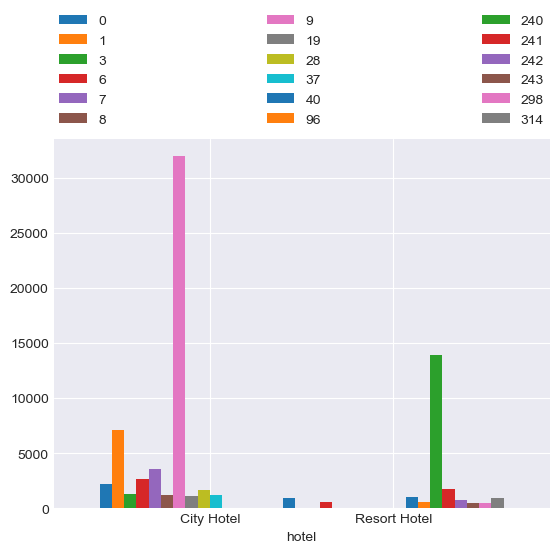

In [30]:
agent_per_hotel = df
agent_per_hotel = agent_per_hotel.loc[agent_per_hotel['distribution_channel'] == 'TA/TO']
agent_per_hotel
agent_per_hotel=agent_per_hotel.groupby(['hotel','agent'],as_index=False).size()

city = agent_per_hotel.loc[agent_per_hotel['hotel'] == 'City Hotel']
resort = agent_per_hotel.loc[agent_per_hotel['hotel'] == 'Resort Hotel']


city =city.nlargest(10,'size')
resort =resort.nlargest(10,'size')

city_agent = city['agent'].to_list()
resort_agent = resort['agent'].to_list()
city = city.pivot(index='hotel',columns='agent',values='size').fillna(0)
resort = resort.pivot(index='hotel',columns='agent',values='size').fillna(0)
city = city.sort_values(by = city_agent)
resort = resort.sort_values(by = resort_agent)

agent_per_hotel = city.append(resort)


agent_per_hotel.plot(kind='bar',width=1.2,rot=0)
agent_per_hotel

plt.legend(bbox_to_anchor=(0, 1.02,1,0.4), loc="lower left",mode='expand',ncol=3,borderaxespad=0)


#### This plot shows the 10 highest agent with respect to the resevation made via them
#### we can see that agent 9 has alot of reservation made by them for the city hotel 

## Reservation Demand


#### The yearly analysis for the number of resevations

<AxesSubplot:>

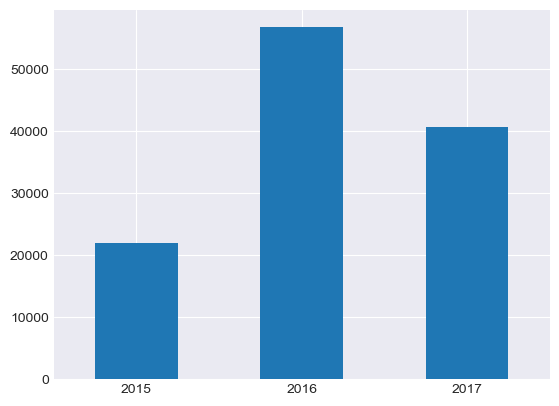

In [32]:
df['arrival_date_year'].value_counts().sort_index(ascending=True).plot.bar(rot=0)

#### From this we may interpert that 2016 was the heaviest with the demand
#### However, the next bar plot shows the months of the avaialbe records for each year


In [33]:
# To sort months
reservation_by_year = df

dates_in_order = pd.date_range(start='2022-01-01', end='2022-12-01', freq='MS')
months_in_order = dates_in_order.map(lambda x: x.month_name()).to_list()
reservation_by_year.arrival_date_month = pd.Categorical(
    reservation_by_year.arrival_date_month,
    categories=months_in_order,
    ordered=True
)

hotel  is_canceled  lead_time  \
arrival_date_year arrival_date_month                                  
2015              January                 0            0          0   
                  February                0            0          0   
                  March                   0            0          0   
                  April                   0            0          0   
                  May                     0            0          0   
                  June                    0            0          0   
                  July                 2776         2776       2776   
                  August               3889         3889       3889   
                  September            5114         5114       5114   
                  October              4957         4957       4957   
                  November             2340         2340       2340   
                  December             2920         2920       2920   
2016              January              2248         2248       2248   
                  February             3891         3891       3891   
                  March                4824         4824       4824   
                  April                5428         5428       5428   
                  May                  5478         5478       5478   
                  June                 5292         5292       5292   
                  July                 4572         4572       4572   
                  August               5063         5063       5063   
                  September            5394         5394       5394   
                  October              6203         6203       6203   
                  November             4454         4454       4454   
                  December             3860         3860       3860   
2017              January              3681         3681       3681   
                  February             4177         4177       4177   
                  March                4970         4970       4970   
                  April                5661         5661       5661   
                  May                  6313         6313       6313   
                  June                 5647         5647       5647   
                  July                 5313         5313       5313   
                  August               4925         4925       4925   
                  September               0            0          0   
                  October                 0            0          0   
                  November                0            0          0   
                  December                0            0          0   

                                      arrival_date_week_number  \
arrival_date_year arrival_date_month                             
2015              January                                    0   
                  February                                   0   
                  March                                      0   
                  April                                      0   
                  May                                        0   
                  June                                       0   
                  July                                    2776   
                  August                                  3889   
                  September                               5114   
                  October                                 4957   
                  November                                2340   
                  December                                2920   
2016              January                                 2248   
                  February                                3891   
                  March                                   4824   
                  April                                   5428   
                  May                                     5478   
                  June                                    5292   
                  J

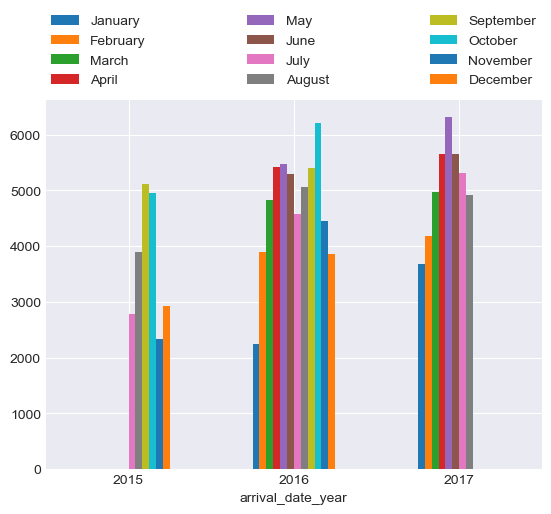

In [34]:

df.groupby(['arrival_date_year','arrival_date_month'],sort=False).count()['hotel'].unstack().plot(kind='bar',rot=0)
plt.legend(bbox_to_anchor=(0, 1.02,1,0.4), loc="lower left",mode='expand',ncol=3,borderaxespad=0)
df.groupby(['arrival_date_year','arrival_date_month'],sort=False).count()


#### We see that may be unfair conclusion since there are less months records for the year 2015 and 2017

## Visitors Analysis

#### Invistigate kind of visitors make more resevations

C:\Users\malkhathery\AppData\Local\Temp\ipykernel_11052\3747025344.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family['res'] = 'Family'
C:\Users\malkhathery\AppData\Local\Temp\ipykernel_11052\3747025344.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indv['res'] = 'Individual'
C:\Users\malkhathery\AppData\Local\Temp\ipykernel_11052\3747025344.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

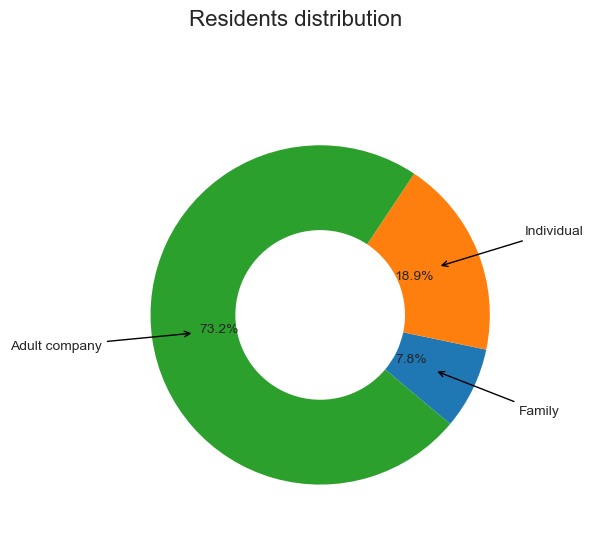

In [35]:
res = df
res['family'] = res['children'] + res['babies']

family = res.loc[res['family'] > 0]
non_fam = res.loc[res['family'] == 0]

indv= non_fam.loc[non_fam['adults'] == 1]
company = non_fam.loc[non_fam['adults'] > 1]

family['res'] = 'Family'
indv['res'] = 'Individual'
company['res'] = 'Adult company'

res_ana = family.append(indv) 
res_ana = res_ana.append(company)



labels = res_ana['res'].unique()
sizes = res_ana.groupby('res',sort=False).size()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
fig.suptitle('Residents distribution', fontsize=16)
wedges, texts, per = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle=-40,autopct='%1.1f%%')

kw = dict(arrowprops=dict(arrowstyle="->"), va="center")
for p, label in zip(wedges, labels):
    ang = np.deg2rad((p.theta1 + p.theta2)/2)
    y = np.sin(ang)
    x = np.cos(ang)
    horizontalalignment = "center" if abs(x) < abs(y) else "right" if x < 0 else "left"
    ax.annotate(label, xy=(0.75*x, 0.75*y), xytext=(1.3*x, 1.3*y),
                horizontalalignment=horizontalalignment, **kw)
plt.tight_layout()
plt.show()



#### Let's break this down to help each hotel to get insights to thier accomedators

<AxesSubplot:ylabel='Resort Hotel'>

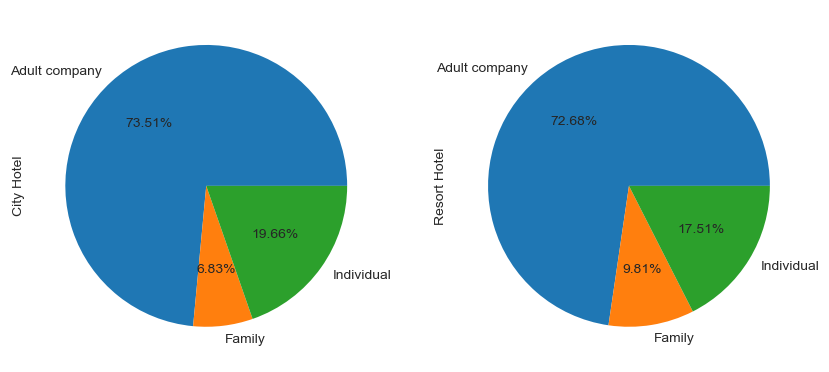

In [37]:
city =res_ana.loc[res_ana['hotel'] == 'City Hotel']
resort = res_ana.loc[res_ana['hotel'] == 'Resort Hotel']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
city.groupby('res').size().plot(kind='pie',ylabel='City Hotel',ax=ax1,autopct='%1.2f%%')
resort.groupby('res').size().plot(kind='pie',ylabel='Resort Hotel',ax=ax2,autopct='%1.2f%%')

#### Apparently families slightly prefer the resort hotel, however most of the revation are made for adults group